<a href="https://www.kaggle.com/code/krhemantk/notebook67f0281cba?scriptVersionId=134034729" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-hunger-index/Global hunger index.csv


In [2]:
df=pd.read_csv('/kaggle/input/global-hunger-index/Global hunger index.csv',encoding='latin-1')
df

,Rank,Country,2000,2007,2014,2022,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Belarus,<5,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chile,<5,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
3,4,China,13.3,7.8,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Croatia,<5,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns.tolist()

['Rank',
 'Country',
 '2000',
 '2007',
 '2014',
 '2022',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11']

In [4]:
#dropping 6 columns that are Unamed....
df=df.drop([ 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11'],axis=1)

In [5]:
df

,Rank,Country,2000,2007,2014,2022
0,1,Belarus,<5,<5,<5,<5
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5
2,3,Chile,<5,<5,<5,<5
3,4,China,13.3,7.8,<5,<5
4,5,Croatia,<5,<5,<5,<5
...,...,...,...,...,...,...
128,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     123 non-null    object
 1   Country  123 non-null    object
 2   2000     123 non-null    object
 3   2007     123 non-null    object
 4   2014     123 non-null    object
 5   2022     123 non-null    object
dtypes: object(6)
memory usage: 6.4+ KB


In [7]:
df.isnull().sum()

Rank       10
Country    10
2000       10
2007       10
2014       10
2022       10
dtype: int64

In [8]:
# Convert columns to numeric
df['2000'] = pd.to_numeric(df['2000'], errors='coerce')
df['2007'] = pd.to_numeric(df['2007'], errors='coerce')
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')

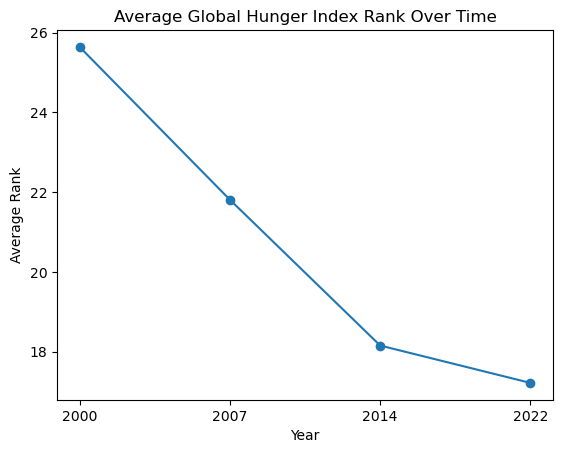

In [9]:
avg_rank_2000 = df['2000'].mean()
avg_rank_2007 = df['2007'].mean()
avg_rank_2014 = df['2014'].mean()
avg_rank_2022 = df['2022'].mean()
# Visualize the average ranks over time
years = ['2000', '2007', '2014', '2022']
avg_ranks = [avg_rank_2000, avg_rank_2007, avg_rank_2014, avg_rank_2022]

plt.plot(years, avg_ranks, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.title('Average Global Hunger Index Rank Over Time')
plt.show()


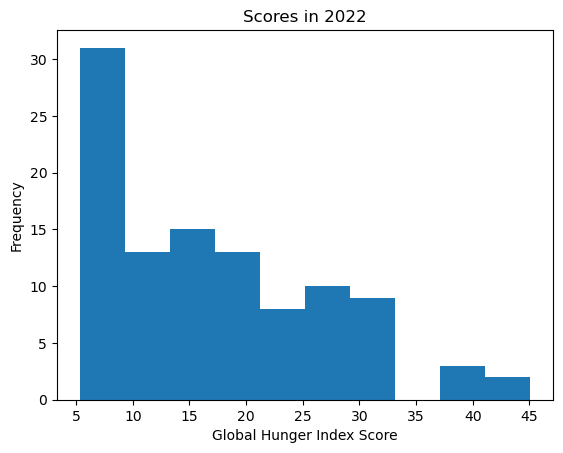

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['2022'].dropna(),bins=10)
plt.xlabel('Global Hunger Index Score')
plt.ylabel('Frequency')
plt.title('Scores in 2022')
plt.show()

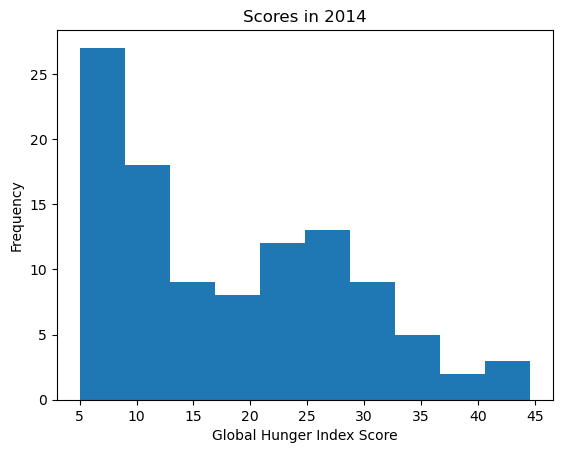

In [11]:
import matplotlib.pyplot as plt
plt.hist(df['2014'].dropna(),bins=10)
plt.xlabel('Global Hunger Index Score')
plt.ylabel('Frequency')
plt.title('Scores in 2014')
plt.show()

<h2>Visualizing the patterns in Selected countries i.e Doing Comparative analysis</h2>

/tmp/ipykernel_20/1023409936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Average_Ranking'] = df_selected[['2000', '2007', '2014', '2022']].mean(axis=1)


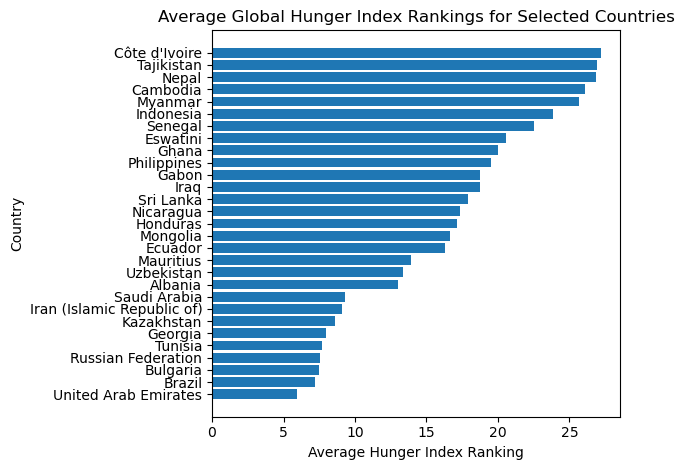

In [12]:
selected_countries = ['United Arab Emirates', 'Brazil', 'Uzbekistan', 'Georgia',
       'Mongolia', 'Bulgaria', 'Kazakhstan', 'Tunisia', 'Albania',
       'Russian Federation', 'Iran (Islamic Republic of)', 'Saudi Arabia',
       'Honduras', 'Mauritius', 'Nicaragua', 'Sri Lanka', 'Iraq', 'Ghana',
       'Tajikistan', 'Philippines', 'Ecuador', 'Myanmar', 'Senegal',
       'Eswatini', "Côte d'Ivoire", 'Cambodia', 'Gabon', 'Indonesia','Nepal']
df_selected = df[df['Country'].isin(selected_countries)]

# Calculate average ranking for selected countries
df_selected['Average_Ranking'] = df_selected[['2000', '2007', '2014', '2022']].mean(axis=1)

# Sort by average ranking
df_selected = df_selected.sort_values(by='Average_Ranking')

# Plot horizontal bar chart
plt.barh(df_selected['Country'], df_selected['Average_Ranking'])
plt.xlabel('Average Hunger Index Ranking')
plt.ylabel('Country')
plt.title('Average Global Hunger Index Rankings for Selected Countries')
plt.tight_layout()
plt.show()